In [17]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
signal = random.sample(range(1,100),64)
#signal = np.array(range(128))
N=len(signal) 


In [18]:
w=N
h=N
matrix_dft = [[0 for x in range(w)] for y in range(h)] 
#np.shape(matrix_dft)
W = np.exp(-1j*2*(np.pi)/N)
W_N=[]
for i in range(N):
    W_N.append(W**i)
DTFT=[] 
for j in range(N):
    matrix_dft[j]= np.power(W_N,j)
invert_dft = np.conjugate(matrix_dft)/N

In [19]:
matrix_dct = [[0 for x in range(N)] for y in range(N)]
inverse_dct = [[0 for x in range(N)] for y in range(N)]

#print(np.shape(matrix_dct))
for i in range(N):
    for j in range(N):
        variable = 2*np.cos((np.pi*i*(2*j+1))/(2*N))
        matrix_dct[i][j] = variable
#print(matrix_dct)
#print(np.shape(matrix_dct))

for i in range(N):
    for j in range(N):
        #print(j)
        variable = (np.cos((np.pi*j*(2*i+1))/(2*N)))/N
        inverse_dct[i][j] = variable
#numpy_dct = np.array(matrix_dct)
#inverse_dct = inverse_dct/(2*N)
for i in range(N):
    inverse_dct[i][0] = inverse_dct[i][0]/2

In [20]:
num = np.sqrt(2)
haar_initial = np.array([[1/num,1/num],[1/num,-1/num]])

In [21]:
def haar(length):
    if(length == 1):
        return haar_initial
    #print(length)
    #np.shape((np.kron(haar(length-1),haar_initial[0])))
    haar_matrix = np.concatenate((np.kron(haar(length-1),haar_initial[0]),np.kron(np.identity(np.power(2,length-1)),haar_initial[1])),axis=0)
    return haar_matrix    

In [22]:

power = 0
divident = N
while(divident/2 !=0):
    power+=1
    divident = divident/2
haar_matrix =haar(power)   
haar_inverse = np.transpose(haar_matrix)

In [23]:
text = raw_input("Please enter the number correspondingly : 1-DFT, 2-DCT, 3-Haar tranform ")
if(text == '1'):
    dft_transform = np.matmul(matrix_dft,signal)
if(text == '2'):
    dct_transform = np.matmul(numpy_dct,signal)
if(text == '3'):
    haar_transform = np.matmul(haar_matrix,signal)
            

    

Please enter the number correspondingly : 1-DFT, 2-DCT, 3-Haar tranform 1


In [24]:
if(text == '1'):
    idft_transform = np.matmul(invert_dft,dft_transform)
if(text == '2'):
    idct_transform = np.matmul(inverse_dct,dct_transform)
if(text == '3'):
    ihaar_transform = np.matmul(haar_inverse,haar_transform)
    
            


In [25]:
def modified_dft(array,L):
    length = len(array)
    i = (length+1-L)/2
    while(i != ((length-1+L)/2)+1):
        array[i]=0
        i+=1
    return array    

In [26]:
def modified_dct(array,L):
    length = len(array)
    i = length-L
    while(i != length):
        array[i]=0
        i+=1
    return array    

In [27]:
def modified_haar(array,L):
    length = len(array)
    i = (length-L)
    while(i != length):
        array[i]=0
        i+=1
    return array    

In [28]:
def energyerror(arrA,arrB):
    length = len(arrA)
    x = np.subtract(arrA,arrB)
    result =(np.sum(np.square(x)))/length 
    return result

In [29]:
dft = np.matmul(matrix_dft,signal)
dct = np.matmul(matrix_dct,signal)
haar = np.matmul(haar_matrix,signal)
errordft=[]
errordct=[]
errorhaar=[]
for i in range(N):
    
    dftm = modified_dft(dft,i)
    signalm = np.matmul(invert_dft,dftm)
    errordft.append(np.real(energyerror(signal,signalm)))
    dctm = modified_dct(dct,i)
    signalm = np.matmul(inverse_dct,dctm)
    errordct.append(np.real(energyerror(signal,signalm)))
    haarm = modified_haar(haar,i)
    signalm = np.matmul(haar_inverse,haarm)
    errorhaar.append(np.real(energyerror(signal,signalm)))

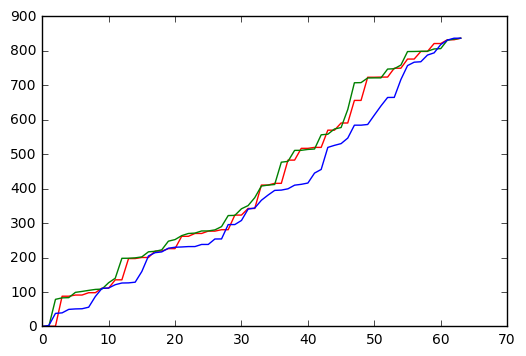

In [31]:
plt.plot(errordft,'r')
plt.plot(errordct,'g')
plt.plot(errorhaar,'b')
plt.show()
